## CNN Demo

Here we illustrate how (dangerously) simple it is to build a convolutional neural network for image classification, using the iconic MNIST dataset. See [this article](https://www.nature.com/articles/d41586-022-02964-6) from last week for greater inspiration!



In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


First, load the MNIST dataset with 60000 training images and 10000 test images.

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

#read in the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
class_label={0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
#class_label={0:"T-shirt/top",1:"Pants",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",
#             6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


'1'

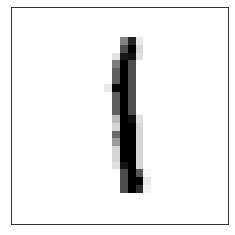

In [3]:
# Plot a few training examples

i = np.random.choice(range(len(x_train)))
plt.imshow(x_train[i,:,:,0], cmap='gray_r')
plt.xticks([])
plt.yticks([])
y = np.argmax(y_train_binary[i])
class_label[y]

Next, we initialize our convolutional neural network similar, with two convolutional layers, two dense layers.

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='tanh'),
        layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [5]:
# Next train it with a single pass through the training data, in mini-batches of size 128

batch_size = 128
epochs = 2

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train_binary, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 16s 37ms/step - loss: 0.7407 - accuracy: 0.7653 - val_loss: 0.0668 - val_accuracy: 0.9803
Epoch 2/2
422/422 [==============================] - 14s 34ms/step - loss: 0.1451 - accuracy: 0.9552 - val_loss: 0.0473 - val_accuracy: 0.9867


In [6]:
score = model.evaluate(x_test, y_test_binary, verbose=0)
print("Test loss: %.4f" % score[0])
print("Test accuracy: %.2f%%" % (100*score[1]))

Test loss: 0.0487
Test accuracy: 98.34%


In [7]:
out = model.predict(x_test)

'5'

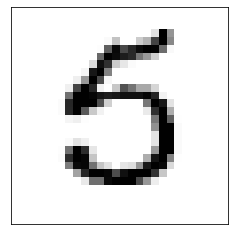

In [8]:
# Look at some test predictions 

i = np.random.choice(range(len(x_test)))
plt.imshow(x_test[i,:,:,0], cmap='gray_r')
plt.xticks([])
plt.yticks([])
class_label[np.argmax(out[i])]

Text(0.5, 1.0, 'label=8\npredicted=2')

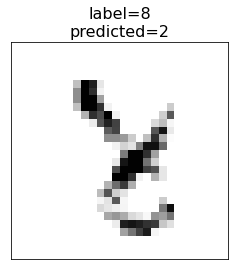

In [9]:
# Now look at some of the mistakes 

mistakes = np.argmax(out, axis=1) != np.argmax(y_test_binary, axis=1)
mistake_indices = np.arange(len(out))[mistakes]

i = np.random.choice(range(len(mistake_indices)))
i = mistake_indices[i]
plt.figure(figsize=(4,4))
plt.imshow(x_test[i,:,:,0], cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.title('label=%s\npredicted=%s' % (class_label[np.argmax(y_test_binary[i])], class_label[np.argmax(out[i])]), fontsize=16)